<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/A-Learning-python/machine-learning/_000_hello_machine/_000_basic/_003_cuk_edu/_005_3_computer_vision/06_cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Errata

1. stride 적용 시 컨볼루션 사이즈 계산 오류  
   강의 중(1차시 15:34) stride 적용시 컨볼루션 출력 사이즈의 일반적인 계산식은  
   `padding='valid'`일 경우,  
   `(n-m+1)/s`이 아니고 **`(n-m)/s + 1`**이 되어야 맞습니다.  
   참고적으로 `padding='same'`인 경우  
   **`(n-1)/s + 1`**이 됩니다.


2. 1차시 25:27분경에 "일반적으로 네트워크 레이어 수를 줄이기 위해서는 **중간의 층수**가 많아야한다" 라는 말은,  
   "일반적으로 네트워크 레이어 수를 줄이기 위해서는 **중간 층의 노드 수가** 많아야한다"라는 표현이 맞습니다.

# 보충 동영상 자료

1. 2차시 optimizer에 대한 보충 동영상 강의 자료입니다.  
https://youtu.be/0vqH1kbQVKY

# 공개 이미지 라이브러리

노트북 파일명: 06-cnn1.ipynb



실행후에 RESTART RUNTIME 버튼이 보이면 클릭해서 런타임 재시작

In [ ]:
!pip install matplotlib==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 26.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## CIFAR-10, CIFAR-100

https://www.cs.toronto.edu/~kriz/cifar.html  

**CIFAR-10**  
10개의 카테고리, 60,000장의 32x32 컬러 이미지  
분류를 위한 기초 데이터 셋  

**CIFAR-100**  
100개의 카테고리 60,000장의 32x32 컬러 이미지  

In [ ]:
from tensorflow import keras
 
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print ("Number of train images: ", x_train.shape[0])
print ("Number of test images:", x_test.shape[0])

# color image
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])

class_names = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
#class_names = ['airplain', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Number of train images:  50000
Number of test images: 10000
Number of channels: 3
Image size: 32 32


In [ ]:
!apt install fonts-nanum-coding

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum-coding
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,083 kB of archives.
After this operation, 4,610 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum-coding all 2.5-1 [1,083 kB]
Fetched 1,083 kB in 1s (1,606 kB/s)
Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
fontprop = fm.FontProperties(fname=path)

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-Hot Encoding (숫자 -> One-Hot Vector) and normalize
NUM_CLASSES = 10
if y_test.shape[1] == 1:
    x_train = x_train/255.
    x_test = x_test/255.
    y_train = to_categorical(y_train, NUM_CLASSES)
    y_test = to_categorical(y_test, NUM_CLASSES)

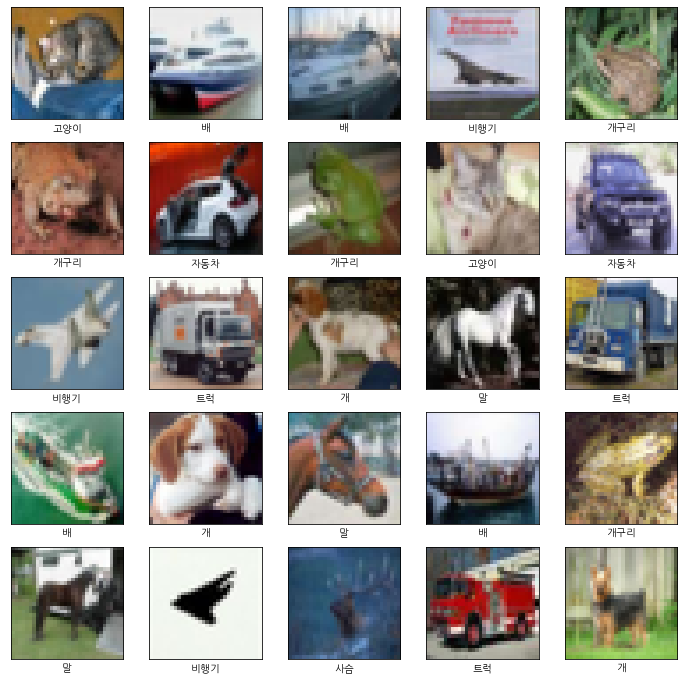

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i].argmax()], fontproperties=fontprop)
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 20s 5ms/step - loss: 1.4796 - accuracy: 0.4587 - val_loss: 1.1894 - val_accuracy: 0.5649
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1053 - accuracy: 0.6115 - val_loss: 1.0847 - val_accuracy: 0.6175
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9565 - accuracy: 0.6662 - val_loss: 0.9778 - val_accuracy: 0.6542
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8605 - accuracy: 0.6999 - val_loss: 0.8976 - val_accuracy: 0.6912
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7846 - accuracy: 0.7263 - val_loss: 0.9388 - val_accuracy: 0.6756
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7297 - accuracy: 0.7461 - val_loss: 0.9389 - val_accuracy: 0.6807
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6748 - accuracy: 0.7628 - val_loss: 0.8587 - val_accuracy

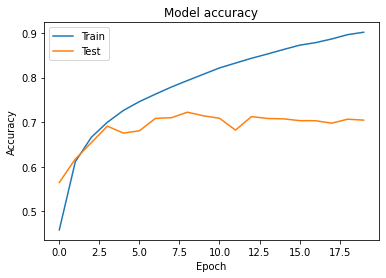

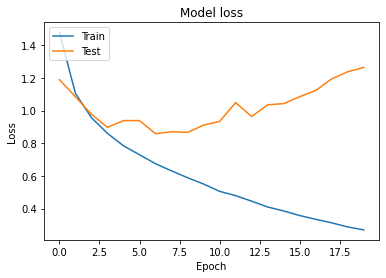

In [ ]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**모델 레이어의 증가**

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1465 - accuracy: 0.9504 - val_loss: 1.6670 - val_accuracy: 0.7211
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1351 - accuracy: 0.9549 - val_loss: 1.5369 - val_accuracy: 0.7403
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1302 - accuracy: 0.9567 - val_loss: 1.5825 - val_accuracy: 0.7306
Epoch 4/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1294 - accuracy: 0.9567 - val_loss: 1.6080 - val_accuracy: 0.7348
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1241 - accuracy: 0.9587 - val_loss: 1.5512 - val_accuracy: 0.7395
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1170 - accuracy: 0.9601 - val_loss: 1.6124 - val_accuracy: 0.7290
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1217 - accuracy: 0.9597 - val_loss: 1.7223 - val_accu

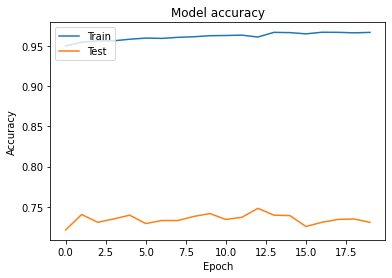

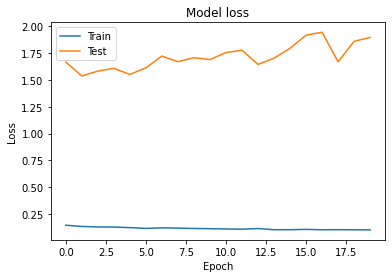

In [ ]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## STL-10

https://cs.stanford.edu/~acoates/stl10/  
10 classes: airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck.  
Images are 96x96 pixels, color.  
500 training images (10 pre-defined folds), 800 test images per class.  

참조 소스코드 URL: https://github.com/matanby/keras-examples/blob/master/stl10.ipynb  


In [ ]:
import os
import urllib.request as urllib
import tarfile
import sys
import numpy as np
from tensorflow import keras

In [ ]:
# the dimensions of each image in the STL-10 dataset (96x96x3).
HEIGHT, WIDTH, DEPTH = 96, 96, 3

# number of classes in the STL-10 dataset.
N_CLASSES = 10

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './stl10_data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
TRAIN_DATA_PATH = DATA_DIR + '/stl10_binary/train_X.bin'

# path to the binary test file with image data
TEST_DATA_PATH = DATA_DIR + '/stl10_binary/test_X.bin'

# path to the binary train file with labels
TRAIN_LABELS_PATH = DATA_DIR + '/stl10_binary/train_y.bin'

# path to the binary test file with labels
TEST_LABELS_PATH = DATA_DIR + '/stl10_binary/test_y.bin'

# path to class names file
CLASS_NAMES_PATH = DATA_DIR + '/stl10_binary/class_names.txt'

In [ ]:
def read_labels(path_to_labels):
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, DEPTH, WIDTH, HEIGHT))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def download_and_extract():
    # if the dataset already exists locally, no need to download it again.
    if all((
        os.path.exists(TRAIN_DATA_PATH),
        os.path.exists(TRAIN_LABELS_PATH),
        os.path.exists(TEST_DATA_PATH),
        os.path.exists(TEST_LABELS_PATH),
    )):
        return
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = keras.utils.get_file(filename, DATA_URL)
    print('Downloaded', filename)
    tarfile.open(filepath, 'r:gz').extractall(dest_directory)


def load_dataset():
    # download the extract the dataset.
    download_and_extract()

    # load the train and test data and labels.
    x_train = read_all_images(TRAIN_DATA_PATH)
    y_train = read_labels(TRAIN_LABELS_PATH)
    x_test = read_all_images(TEST_DATA_PATH)
    y_test = read_labels(TEST_LABELS_PATH)

    # convert all images to floats in the range [0, 1]
    x_train = x_train.astype('float32')
    x_train = (x_train - 127.5) / 127.5
    x_test = x_test.astype('float32')
    x_test = (x_test - 127.5) / 127.5
    
    # convert the labels to be zero based.
    y_train -= 1
    y_test -= 1

    # convert labels to hot-one vectors.
    y_train = keras.utils.to_categorical(y_train, N_CLASSES)
    y_test = keras.utils.to_categorical(y_test, N_CLASSES)

    return (x_train, y_train), (x_test, y_test)

In [ ]:
(x_train, y_train), (x_test, y_test) = load_dataset()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

Exception: ignored

In [ ]:
def plot_images(images, n_images):
    _, h, w, d = images.shape
    # create an array that will store the images to plot.
    canvas = np.empty((h * n_images, w * n_images, d), dtype='uint8')

    for i in range(n_images):
        img_column = images[i * n_images:(i + 1) * n_images]
        for j in range(n_images):
            if j >= img_column.shape[0]:
                break

            # transform images to the range [0, 255]
            img = img_column[j]
            img = ((img * 127.5) + 127.5).clip(0, 255).astype('uint8')            
            canvas[i * h:(i + 1) * h, j * w:(j + 1) * w] = img

    plt.figure(figsize=(2 * n_images, 2 * n_images))
    plt.axis('off')
    cmap = 'gray' if d == 1 else None
    plt.imshow(canvas.squeeze(), origin="upper", cmap=cmap)
    plt.show()

plot_images(x_train, 10)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
157/157 [==============================] - 9s 48ms/step - loss: 1.7182 - accuracy: 0.3640 - val_loss: 1.4255 - val_accuracy: 0.4659
Epoch 2/20
157/157 [==============================] - 5s 29ms/step - loss: 1.2759 - accuracy: 0.5264 - val_loss: 1.3194 - val_accuracy: 0.5211
Epoch 3/20
157/157 [==============================] - 6s 37ms/step - loss: 1.0318 - accuracy: 0.6172 - val_loss: 1.2582 - val_accuracy: 0.5523
Epoch 4/20
157/157 [==============================] - 6s 36ms/step - loss: 0.7365 - accuracy: 0.7414 - val_loss: 1.3963 - val_accuracy: 0.5431
Epoch 5/20
157/157 [==============================] - 6s 37ms/step - loss: 0.4835 - accuracy: 0.8308 - val_loss: 1.5842 - val_accuracy: 0.5381
Epoch 6/20
157/157 [==============================] - 6s 37ms/step - loss: 0.2696 - accuracy: 0.9122 - val_loss: 2.0158 - val_accuracy: 0.5408
Epoch 7/20
157/157 [==============================] - 5s 29ms/step - loss: 0.1305 - accuracy: 0.9624 - val_loss: 2.3518 - val_accuracy: 0.5325

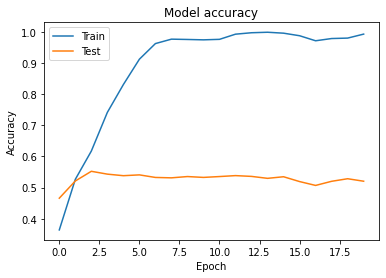

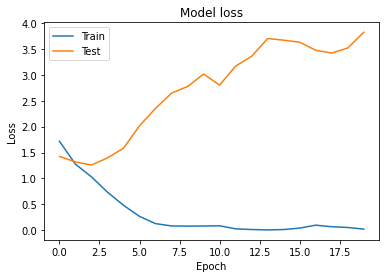

In [ ]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## imagenet

https://github.com/jkjung-avt/keras_imagenet  

이미지넷 2012 다운로드 (아카데미 토렌트)  
https://academictorrents.com/collection/imagenet-2012  
validation set 정리방법  
https://github.com/developer0hye/Setup-for-Imagenet  

## imagenette



subset of imageNet  
https://github.com/fastai/imagenette  


In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz

--2021-10-05 13:15:44--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.90.222
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.90.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99003388 (94M) [application/x-tar]
Saving to: ‘imagenette2-160.tgz’

imagenette2-160.tgz 100%[===================>]  94.42M  36.6MB/s    in 2.6s    

2021-10-05 13:15:47 (36.6 MB/s) - ‘imagenette2-160.tgz’ saved [99003388/99003388]



In [ ]:
!tar xvzf imagenette2-160.tgz

In [ ]:
json_path = keras.utils.get_file("imagenet_class_index.json", "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json")

49152/35363 [=========================================] - 0s 0us/step


In [ ]:
import json
# Opening JSON file 
with open(json_path) as json_file: 
    imagenet_class_index = json.load(json_file) 

In [ ]:
imagenet_class_index['0']

['n01440764', 'tench']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def preprocess_input(x):
  x = x/255.
  return x
datagen_train = ImageDataGenerator(preprocessing_function = preprocess_input)
training_set = datagen_train.flow_from_directory('imagenette2-160/train',
                                                 target_size = (160, 160),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
datagen_test = ImageDataGenerator(preprocessing_function = preprocess_input)
test_set = datagen_test.flow_from_directory('imagenette2-160/val',
                                                 target_size = (160, 160),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


imagenette 클래스 명 정의하기

In [ ]:
class_indices = list(training_set.class_indices.keys())
class_values = list(training_set.class_indices.values())
class_names=[]
for i in range(1000):
  if imagenet_class_index['{}'.format(i)][0] in class_indices:
    class_names.append(imagenet_class_index['{}'.format(i)][1])

In [ ]:
class_names

['tench',
 'English_springer',
 'cassette_player',
 'chain_saw',
 'church',
 'French_horn',
 'garbage_truck',
 'gas_pump',
 'golf_ball',
 'parachute']

테스트 데이터 첫번째 배치 읽어들이기

In [ ]:
x_test, y_test = test_set[0]

이미지 확인해보기

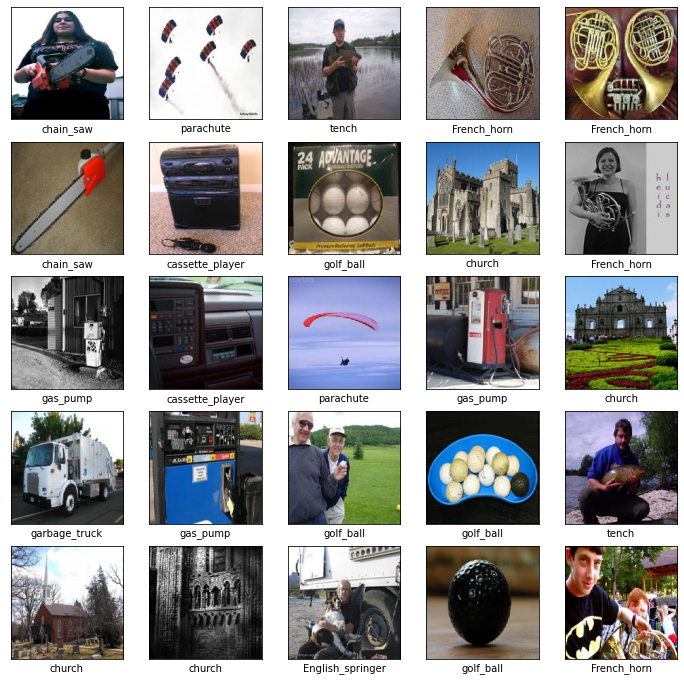

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i].argmax()])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(160, 160, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

학습하기 (epoch은 100정도가 적당)

In [ ]:
history = model.fit(training_set, steps_per_epoch=16,
          validation_data=test_set, 
          validation_steps=8, 
          epochs=10)

Epoch 1/10
16/16 [==============================] - 3s 117ms/step - loss: 2.5005 - accuracy: 0.1328 - val_loss: 2.2458 - val_accuracy: 0.1328
Epoch 2/10
16/16 [==============================] - 2s 102ms/step - loss: 2.2260 - accuracy: 0.1719 - val_loss: 2.1675 - val_accuracy: 0.2109
Epoch 3/10
16/16 [==============================] - 2s 101ms/step - loss: 2.0996 - accuracy: 0.2168 - val_loss: 2.1816 - val_accuracy: 0.1523
Epoch 4/10
16/16 [==============================] - 2s 103ms/step - loss: 2.0337 - accuracy: 0.2559 - val_loss: 2.0997 - val_accuracy: 0.2148
Epoch 5/10
16/16 [==============================] - 2s 99ms/step - loss: 1.9837 - accuracy: 0.2988 - val_loss: 1.9930 - val_accuracy: 0.3125
Epoch 6/10
16/16 [==============================] - 2s 101ms/step - loss: 1.8374 - accuracy: 0.3516 - val_loss: 1.8664 - val_accuracy: 0.3828
Epoch 7/10
16/16 [==============================] - 2s 113ms/step - loss: 1.8077 - accuracy: 0.3945 - val_loss: 1.6812 - val_accuracy: 0.4023
Epoch 8

# Optimizer

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

# 구글 코랩에서 애니메이션 표시용
rc('animation', html='jshtml')

여러가지 옵티마이저 설정 및 테스트

In [24]:
import tensorflow as tf

#opt = tf.keras.optimizers.SGD(learning_rate=0.45)
#opt = tf.keras.optimizers.SGD(learning_rate=0.45, momentum=0.55)
#opt = tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.55)
#opt = tf.keras.optimizers.SGD(learning_rate=0.2)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)
#opt = tf.keras.optimizers.RMSprop(learning_rate=0.2)
#opt = tf.keras.optimizers.Adam(learning_rate=0.45)
opt = tf.keras.optimizers.Adam(learning_rate=0.2)

손실 함수  
$ L = (0.4w_1^2 + 4w_2^2) / 2$  

In [25]:
# weights 초기화
w1 = tf.Variable(0.45)
w2 = tf.Variable(0.30)
loss = lambda: (4*0.1*w1**2 + 4*w2**2)/2.0       # d(loss)/d(dw) == [w1, w2]

In [28]:
x_stt = -0.5
x_end = 0.5
y_stt = -0.5
y_end = 0.5

x = np.linspace(x_stt, x_end, 21)
y = np.linspace(y_stt, y_end, 21)
z = np.array([(4*0.1*i*i+4*j*j)/2.0 for j in y for i in x])

X, Y = np.meshgrid(x, y)
Z = z.reshape(21, 21)

w1_log = []
w2_log = []

for epoch in range(0,100):
  w1_log.append(w1.numpy())
  w2_log.append(w2.numpy())
  step_count = opt.minimize(loss, [w1, w2]).numpy()
  # The first step is `-learning_rate*sign(grad)`  
print(w1.numpy(), w2.numpy())

7.807643e-06 -2.592043e-06


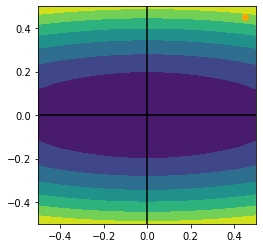

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.contourf(X,Y,Z)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis([x_stt,x_end,y_stt,y_end])
ax2, = ax.plot([], [], color='orange')
ax3, = ax.plot([], [], 'o', color='orange')

def animate(i):
  ax2.set_data(w1_log[0:i], w2_log[0:i])
  ax3.set_data(w1_log[i], w2_log[i])
  return (ax2,)

i = np.arange(len(w1_log))
ani = matplotlib.animation.FuncAnimation(fig, animate,
                                         frames=i, interval=100)
ani

**minimize의 내부**  
  
`minimize` 대신에 `GradientTape`와  
`opt.apply_gradients`를 사용하는 방법  

In [ ]:
# weights 초기화
w1 = tf.Variable(0.45)
w2 = tf.Variable(0.45)

w1_log = []
w2_log = []

for epoch in range(0,1):
  w1_log.append(w1.numpy())
  w2_log.append(w2.numpy())

  #step_count = opt.minimize(loss, [w1, w2]).numpy()
  with tf.GradientTape() as tape:
    total_loss = loss()
  grads = tape.gradient(total_loss, [w1, w2])
  opt.apply_gradients(zip(grads, [w1,w2]))

  print('grads =', grads[0].numpy(), grads[1].numpy())
  print('w =', w1.numpy(),w2.numpy())

grads = 0.17999999 1.7999998
w = 0.25392455 0.25392142


**gradient descent optimizer**  

$
\begin{align}
L &= (0.4w_1^2 + 4w_2^2)/2 \\
\\
{\partial L \over \partial w_1} &= 0.4 w_1 =0.4\cdot0.45 \\
\\
w_1 &\rightarrow w_1 - \eta{\partial L \over \partial w_1}
\end{align}
$

In [ ]:
[0.45 - 0.45*0.4*0.45, 0.45 - 0.45*4*0.45]

[0.369, -0.36000000000000004]

# 보충자료

**Gradient**
$$
L(w,b) = (\hat y-y)^2/2 = (wx+b-y)^2/2\\
{\partial L\over\partial w} = (wx+b-y)\cdot x\\
{\partial L\over\partial b} = wx+b-y\\
\nabla L = \left({\partial L\over\partial w},{\partial L\over\partial b}\right)
$$

일반적으로,
$$
L(w^{[1]}_{11}, w^{[1]}_{21}, ... , w^{[l]}_{ij},..., 
b^{[1]}_1,..., b^{[l]}_j,...)\\
\nabla L = \left({\partial L\over\partial w^{[1]}_{11}},{\partial L\over\partial w^{[1]}_{21}},...,
{\partial L\over\partial w^{[l]}_{ij}},...,
{\partial L\over\partial b^{[1]}_1},...,
{\partial L\over\partial b^{[l]}_j},...,
\right)
$$

**w1, w2의 초기값의 다른 예**

In [ ]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1)

# weights 초기화
w1 = tf.Variable(0.45)
w2 = tf.Variable(0.30)
loss = lambda: (4*0.1*w1**2 + 4*w2**2)/2.0       # d(loss)/d(dw) == [w1, w2]

x_stt = -0.5
x_end = 0.5
y_stt = -0.5
y_end = 0.5

x = np.linspace(x_stt, x_end, 21)
y = np.linspace(y_stt, y_end, 21)
z = np.array([(4*0.1*i*i+4*j*j)/2.0 for j in y for i in x])

X, Y = np.meshgrid(x, y)
Z = z.reshape(21, 21)

w1_log = []
w2_log = []

for epoch in range(0,100):
  w1_log.append(w1.numpy())
  w2_log.append(w2.numpy())
  step_count = opt.minimize(loss, [w1, w2]).numpy()
  # The first step is `-learning_rate*sign(grad)`  
print(w1.numpy(), w2.numpy())



0.045160532 0.05081714


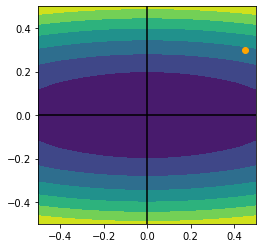

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.contourf(X,Y,Z)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.axis([x_stt,x_end,y_stt,y_end])
ax2, = ax.plot([], [], color='orange')
ax3, = ax.plot([], [], 'o', color='orange')

def animate(i):
  ax2.set_data(w1_log[0:i], w2_log[0:i])
  ax3.set_data(w1_log[i], w2_log[i])
  return (ax2,)

i = np.arange(len(w1_log))
ani = matplotlib.animation.FuncAnimation(fig, animate,
                                         frames=i, interval=100)
ani

# stride 시 컨볼루션 출력 크기의 계산

In [8]:
#@title
from tensorflow import keras

m = 32 # image height,width = (m,m)
n = 5 # conv filter size = (n,n)
s = 2 # stride
padding = 'same' # 'same' or 'valid'

inputs = keras.layers.Input((m,m,1))
outputs = keras.layers.Conv2D(1, (n,n), strides=(s,s), padding=padding)(inputs)
print(outputs.shape[1])
if padding == 'valid':
    print( (m-n)//s+1)
else:
    print( (m-1)//s+1)

16
16
